

# Project: Investigating No-show Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information of 100,000 medical appointments in a hospital in Brazil, focusing on if patients show up for their medical appointments or not. I would be investigating this dataset by performing an analysis that predicts if and how different factors/variables affect if a patient shows up for appointments or not. Exploratory Data analysis was performed in this analysis. The dataset includes the following columns and their description;
PatientId- displays the id of each patient,
AppointmentID - displays the id of each appointment made,
Gender - describes the sex of each patient, whether it's M (male) or F (female),
ScheduledDay - describes the scheduled day of appointments set up by patients,
AppointmentDay - describes the day of the appointment,
Age - describes the age of each patient,
Neigbourhood - describes the hospital's location,
Scholarship - describes if patients are registered in the Brazillian welfare program or not,
Hipertension - describes if a patient has hypertension or not,
Diabetes - describes if a patient is diabetic or not,
Alcoholism - describes if a patient is an alcoholic or not,
Handcap - describes if a patient is handicapped or not,
SMS-received - describes if patients receive SMS or not,
No-show - describes if a patient showed up for scheduled appointments or not. 'No' is if they showed up, 'Yes' is if they did not show up.

The dataset can be found on this website https://www.kaggle.com/datasets/joniarroba/noshowappointments



### Question(s) for Analysis
<ul>
    <li>What is the percentage of patients that show up and do not show up for appointments?</li>
    <li>Which neighborhood has the highest number of patients that show up for appointments?</li>
    <li>What gender of patients shows up for appointments more?</li>
    <li>What age group of patients shows up or not for appointments?</li>
    <li>Do patients show up or not for appointments based on SMS received?</li>
    <li>Is disease condition a factor that predicts if patients show up for appointments or not?</li>
</ul>

In [1]:
%matplotlib inline
# This cell imports the libraries that will be used in the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

This section is going to investigate and analyse the dataset to check for issues and then solve those issues. The steps are described in the cells below.



In [2]:
#load the dataset
my_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

**my_df** was used to name the dataset. It is the short form of my_dataframe.

In [3]:
#print the first 10 rows in the dataset
my_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


It was observed that the dataset contains one dependent variable, which is the 'No-show' variable, and 13 independent variables

In [4]:
#display number of rows and columns in the dataset
my_df.shape

(110527, 14)

The dataset has 14 columns and 110527 rows

In [5]:
#display the statistics of the dataset
my_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the statistics above, it has been observed that the average Age is 37, minimum age is -1, which is an invalid age number because nobody
is aged -1, so this is going to be removed from the dataset, and the maximum age which 115 years is going to be removed
because the number of people aged 115 are very few. It was also observed that the lowest quartile of age distribution (25%) of the patients are 0-18 years of age, the second quartile (50%) of the age distribution is between 19-37 years, the 3rd quartile (75%) of the age distribution is between 38-55 years, and the highest quartile is 75 years and above.This shows that a higher number of patients are older people. Also, the handcap column is quite different from other categorical columns with 0 and 1. The handcap column contains 0-4 values, 4 being the maximum and according to the dataset creator from the official website of the dataset https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699, the values represents the number of disabilities a patient has. For example, if a patient has physical, visual and other handicapped conditions, the value is 4, if a patient has physical and visual, the value is 2, and if a patient has just one disability, the value is 1. 

In [6]:
#check the general information on the dataset
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#check the datatypes of each variable in the dataset
my_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

It was observed that the datatype for PatientId is float. This is going to be changed to integer. Also, the scheduledDay column and the AppointmentDay column
is going to be changed to the dateTime datatype because they are dates so they cannot be of string datastype.

In [8]:
#check the column names of the dataset
my_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Some of the column names in the dataset are not in correct shape, that is, there are typos like the 'hipertension' and 'Handcap' columns.
Also, the 'No-show' column name would be changed and the hyphen would be replaced with an underscore. The same would be done for 
the 'PatientId', 'AppointmentID', 'ScheduledDay', and 'AppointmentDay' columns.

In [9]:
#check for number of duplicates
my_df.duplicated().sum()

0

The dataset does not contain any duplicates

In [10]:
#check for null or NaN values
my_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
#drop any null values
my_df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


There are no null or missing values in the dataset. I used the **dropna()** function to confirm that there are no missing values in the dataset. 

In [12]:
#check for unique values
my_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [13]:
my_df['PatientId'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

It was observed that there are unique values in each column. From the PatientId and AppointmentID column, it was seen that the AppointmentID column has more unique values than the PatientId column. This means that some patients have so many registered AppointmentIDs. Using the value_counts function on the PatientId column, it was seen that a patient id was repeated or registered so many times.

In this first section, I was able to investigate get some observations or discoveries from the dataset. I observed the following; wrong or incorrect column names, wrong datatypes, invalid values in the Age column.
The following is going to be done to address these issues;
correct and rename columns, correct the datatypes, and drop rows with invalid age values in the Age column.


### Data Cleaning
In this section, I am going to be cleaning the data to fix the issues that were discovered in the first section. The following cells are going to address these issues. 

The first thing I am going to do is rename and correct column names. I am going to rename PatientId, AppointmentID, ScheduledDay, AppointmentDay, Hipertension, Handcap, and No-show. To do this, I created a function that takes as input the column names and outputs the modified column names.

In [14]:
#function to rename columns and correct typos
def col_correct(name):
    if 'Day' in name: # for AppointmentDay and ScheduledDay
        name=(name[:-3] + '_' + name[-3:]) #split the names and add underscore _
    if 'Id' in name: #for PatientId
        name = (name[:-2] + '_' + name[-2:]) #split the name and add underscore _
    if 'ID' in name: #for AppintmentID
        name = (name[:-2] + '_' + name[-2:]) #split the name and add underscore _
    if 'Hipertension' in name: #for Hipertension
        name = name.strip().replace('Hipertension', 'Hypertension') #replace with Hypertension
    if 'Handcap' in name: #for Handcap
        name = name.strip().replace('Handcap', 'Handicapped') #replace with Handicapped
    name = name.strip().replace('-', '_') #replace - with _ as in No-show to No_show
    
    return name

In [15]:
my_df.rename(columns = lambda col: col_correct(col), inplace=True)

#check new column names
list(my_df.columns)

['Patient_Id',
 'Appointment_ID',
 'Gender',
 'Scheduled_Day',
 'Appointment_Day',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicapped',
 'SMS_received',
 'No_show']

Next,I am going to change the datatype of Patient_Id from float to int, and I am going to change the datatypes of Scheduled_Day and Appointment_Day from string to dateTime datatype

In [16]:
#correct datatypes of Patient_Id, Scheduled_Day, and Appointment_Day
my_df['Patient_Id'] = my_df['Patient_Id'].astype(int)
my_df['Scheduled_Day'] = pd.to_datetime(my_df['Scheduled_Day'])
my_df['Appointment_Day'] = pd.to_datetime(my_df['Appointment_Day'])

#check new datatypes
my_df.dtypes

Patient_Id                  int64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicapped                 int64
SMS_received                int64
No_show                    object
dtype: object

The datatypes for Patient_id, Scheduled_day, and Appointment_day have been successfully converted to the correct datatypes

Next, I am going to use a box plot to check for outliers in the Age column. The statistics table in cell 6 exposed the outliers in the Age column. The min age is -1 and the maximum age is 115. Boxplots identifies outliers by displaying the interquartile range (IQR) of the data showing the outliers outside the whiskers. They can be used to identify outliers in multiple variables or in a single variable. 

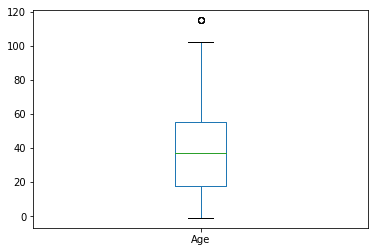

In [17]:
#box plot for the Age column to identify outliers
my_df['Age'].plot(kind = 'box');

It is seen from the boxplot above that there are outliers after age 100. I am going to view the exact values that are identified as outliers by calculating the interquartile range (IQR).

Before that, I am going to use the **.percentile()** function to identify these exact outlier values by calculating the outlier points using IQR which equates to the subtraction of Q1 from Q3 (Q3-Q1). The outlier points are the ones that fall below Q1-1.5xIQR or the ones that are above Q3+1.5xIQR. The Q1 represents the 25th percentile of the dataset column and the Q3 represents the 75th percentile of the dataset. In the Age column, the 25th percentile is 18 and the 75th percentile is 55.

In [18]:
#identify outlier values
Q1,Q3 = np.percentile(my_df['Age'], (25,75))
Q1, Q3

(18.0, 55.0)

In [22]:
#computation of the IQR range
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
upper_limit, lower_limit

(110.5, -37.5)

In [23]:
#retrieve outlier values
age_outliers = my_df['Age'][(my_df['Age'] > upper_limit) | (my_df['Age'] < lower_limit)]
print("The exact outlier values in Age are:" + str(len(age_outliers)))
age_outliers

The exact outlier values in Age are:0


Series([], Name: Age, dtype: int64)

The exact outlier value is 115. I am going to drop the rows that contain these outlier values and values less than 0 years of age

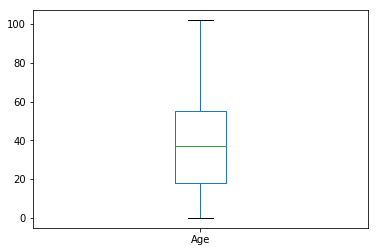

In [24]:
#drop rows less than 0 and greater than 102 years of age
my_df.drop(my_df[my_df['Age'] > 102 ].index, inplace = True)
my_df.drop(my_df[my_df['Age'] < 0 ].index, inplace = True)

#box plot to check if the outliers are gone
my_df['Age'].plot(kind = 'box');

In [25]:
#statistics of Age column
my_df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

I successfully removed the outliers in the Age column and also removed the invalid age which was -1. 

In this cell, I am going to create an Age group column for the Ages by cutting them into several groups. The age groups would be 0-18, 19-37, 38-56, above 56

In [26]:
#use pandas.cut() to divide the ages into groups
Age_range = pd.cut(x=my_df['Age'], bins=[0,18,37,55,102], labels = ['0 to 18', '19 to 37', '38 to 55', 'above 55'])

#insert the age_range column to the dataset
my_df.insert(6, 'Age_range', Age_range)


my_df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Age_range,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,above 55,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,above 55,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,above 55,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,0 to 18,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,above 55,JARDIM DA PENHA,0,1,1,0,0,0,No


I am going to drop columns that I feel I would not need or make use of in this analysis

In [27]:
#drop the columns that would not be needed 
my_df.drop(['Age', 'Patient_Id', 'Appointment_ID', 'Appointment_Day'], axis = 1, inplace=True)

#show top 3
my_df.head(3)

,Gender,Scheduled_Day,Age_range,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,F,2016-04-29 18:38:08,above 55,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,above 55,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,above 55,MATA DA PRAIA,0,0,0,0,0,0,No


In order to make understanding easier and to avoid a little bit of confusion regarding the 'No_sure' column that says 'No' is if the patient showed up, 'Yes' is if the patient did not show up, I changed the No and Yes values to represent 'Showed up' and 'Missed' respectively. No means the patient 'Showed up' for appointment and Yes means the patient 'Missed' appointment. The following cells indicates/shows the changes made

In [28]:
"""change the values of "No" and "Yes" in the 'No_show' column to 'Showed_up' and 'Missed'"""
my_df.loc[my_df['No_show'] == 'No', 'No_show'] = 'Showed_up'
my_df.loc[my_df['No_show'] == 'Yes', 'No_show'] = 'Missed'

my_df['No_show'].unique()

array(['Showed_up', 'Missed'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis
In this section, I am going to be answering the research questions gotten from the dataset for this analysis using visualizations like bar charts, pie charts, and histograms.






Before answering the research questions, I am going to be checking the distributions of all the factors/columns in the dataset using a histogram.

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


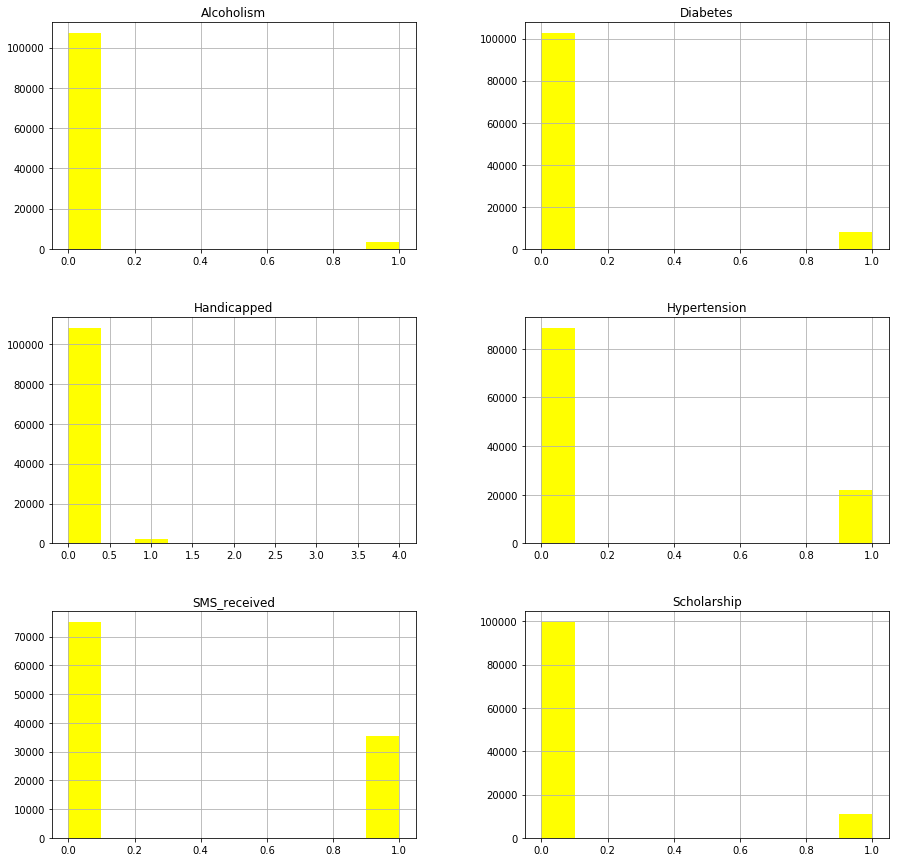

In [29]:
#histogram plot of all variables
my_df.hist(figsize=(15,15), color = 'Yellow');

#display the plot statistics
pd.DataFrame(my_df.describe())

It can be seen from the **Alcoholism** chart that non-alcoholics are more than alcoholics. In the **Diabetes** chart, patients that are non-diabetic are more than diabetic patients. In the **Handicapped** chart, patients with diabilities are very few compared to those without disabilities. 1 means a patient has one disability. In the **Hypertension** chart, hypertentic patients are fewer than non-hypertentic patients. In the **SMS_received** chart, the number of patients that did not receive SMS reminders are more than those that received and in the **Scholarship** chart, patients that are enrolled in the welfare program on scholarship are fewer than those that are not enrolled in the program. **Age** and **SMS_received** factors are part of the factors that were used to predict patients that show up for appointments or not in this analysis. The other factors used were **Gender** and **Neighborhood**.

# Question 1: What is the percentage of patients that show up and do not show up for appointments?

We want to see the general percentage of people that actually shows up for appointments and people that don't show up. This is going to visualized using a pie chart.

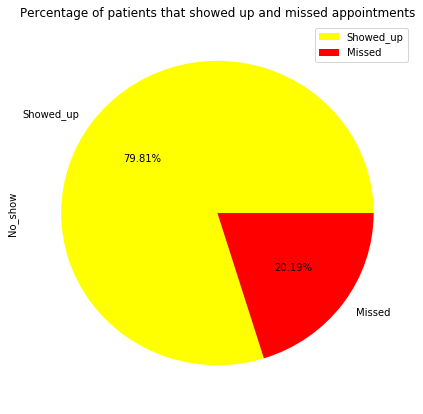

In [30]:
#pie chart of kept and missed appointments
colors = ['Yellow', 'red']
my_df['No_show'].value_counts().plot.pie(figsize=(7,7), autopct='%.2f%%', colors=colors, 
                                              title = 'Percentage of patients that showed up and missed appointments', legend=True);
plt.show()

From the pie chart above, it is seen that the percentage of patients that show up for appointments is greater than the percentage that miss appointments.

### Question 2: What gender of patients show up for appointments more?

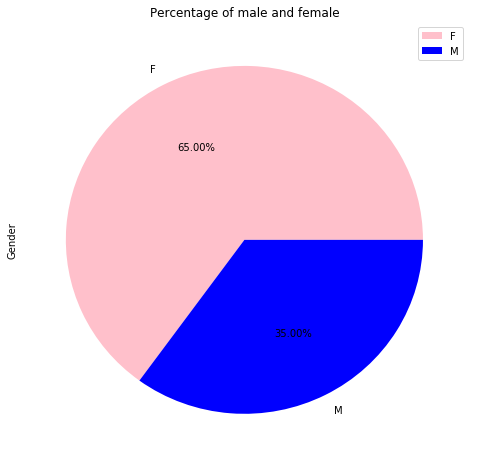

In [31]:
#pie chart to check percentage of male and female
colors = ['Pink', 'Blue']
my_df['Gender'].value_counts().plot.pie(figsize=(8,8), autopct='%.2f%%', colors=colors, 
                                              title = 'Percentage of male and female', legend=True);
plt.show()

In the chart above, it can be seen that 65% of the patients are females and 35% are males.

No_show
Gender No_show           
F      Missed       14591
       Showed_up    57243
M      Missed        7725
       Showed_up    30962

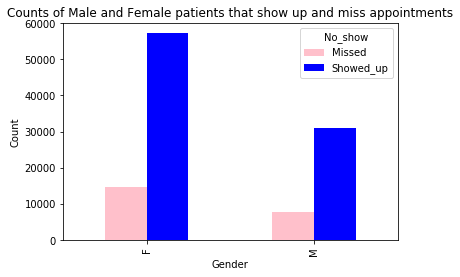

In [32]:
#group by count of Gender and No_show column and create plot
gender = my_df.groupby(['Gender', 'No_show'])[['No_show']].size()

#create bar plot of counts
gender = gender.unstack()
gender.plot(kind = 'bar', color = ['Pink', 'Blue'], title = 'Counts of Male and Female patients that show up and miss appointments').set_ylabel('Count')

#display the plot statistics
pd.DataFrame(my_df.groupby(['Gender', 'No_show'])['No_show'].size())

From the bar chart above, it can be seen that Females show up for appointments more than males. This is just to show that women care more about their health than men.

# Question 3: Which neighbourhood has the highest number of patients that show up for appointments?

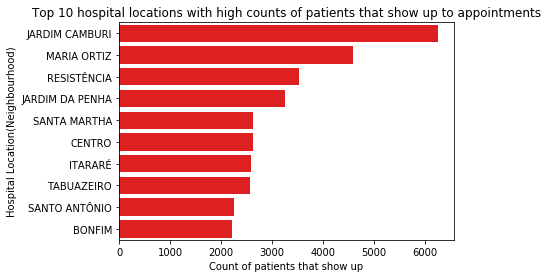

,Neighbourhood
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635
CENTRO,2631
ITARARÉ,2591
TABUAZEIRO,2559
SANTO ANTÔNIO,2262
BONFIM,2223


In [33]:
#retrieve list of showed_up
showed_up = my_df[my_df.No_show == 'Showed_up']

#top 10 neighbourhood with the highest counts of appointments kept
neighbourhood = showed_up['Neighbourhood'].value_counts().index[:10]

# create a horizontal barplot of the top 10 neighborhoods with high counts of patients that show up for appointments
sns.countplot(data = showed_up, y = 'Neighbourhood', order = neighbourhood, color = 'Red')
plt.title('Top 10 hospital locations with high counts of patients that show up to appointments')
plt.xlabel('Count of patients that show up')
plt.ylabel('Hospital Location(Neighbourhood)');
plt.show();

#display the plot statistics
pd.DataFrame(showed_up['Neighbourhood'].value_counts().head(10))

The JARDIM CAMBURI neighborhood has the highest number of patients (6252) that show up for appointments. I selected the top 10 highest counts in the neighborhood column to see which neighbourhood has more patients that keep appointments.

# Question 4: What age group of patients show up or not for appointments?

No_show
Age_range No_show           
0 to 18   Missed        5708
          Showed_up    19619
19 to 37  Missed        6414
          Showed_up    20836
38 to 55  Missed        5255
          Showed_up    21651
above 55  Missed        4300
          Showed_up    23199

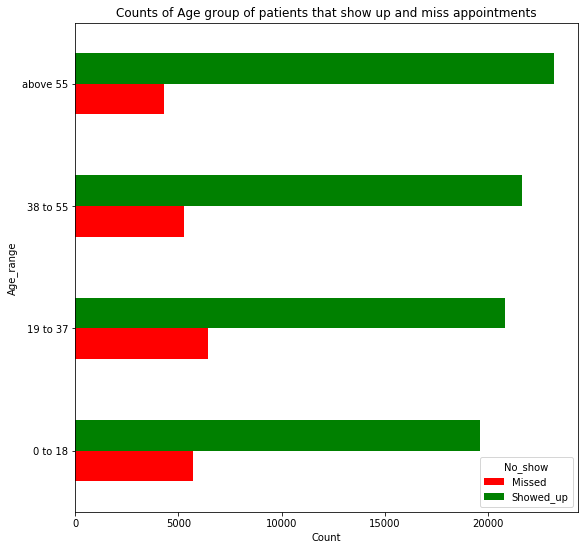

In [34]:
#group by count of Age_group and No_show column and create plot
age = my_df.groupby(['Age_range', 'No_show'])[['No_show']].size()
age

#create horizontal bar plot of counts
age = age.unstack()
age.plot(kind = 'barh', color = ['Red', 'Green'], title = 'Counts of Age group of patients that show up and miss appointments', figsize=(9,9)).set_xlabel('Count')

#display the plot statistics
pd.DataFrame(my_df.groupby(['Age_range', 'No_show'])['No_show'].size())

It can be seen that patients that are above the age of 55 years keep up with appointments with a count of over 23,000 than miss appointments more than other age groups.

# Question 5: Do patients show up or not for appointments based on SMS received?

This section is going to answer the question of if patients show up for appointments based on SMS reminders or not. 

No_show
SMS_received No_show           
0            Missed       12532
             Showed_up    62508
1            Missed        9784
             Showed_up    25697

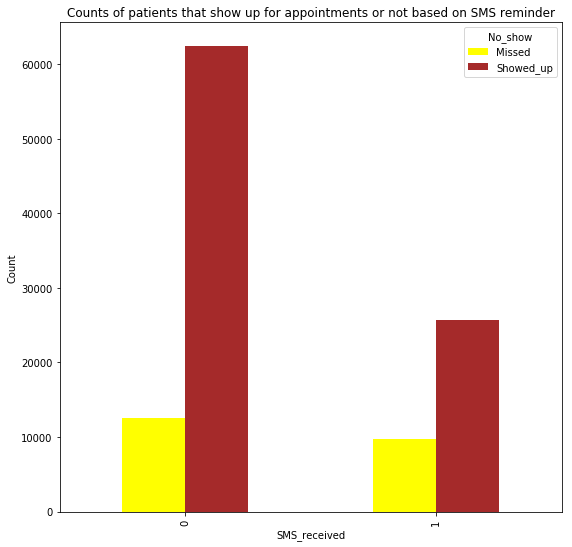

In [35]:
#group SMS received and No_show column
SMS = my_df.groupby(['SMS_received', 'No_show'])[['No_show']].size()
SMS

#create bar plot of counts
SMS = SMS.unstack()
SMS.plot(kind = 'bar', color = ['Yellow', 'Brown'], title = 'Counts of patients that show up for appointments or not based on SMS reminder', figsize=(9,9)).set_ylabel('Count')

#display the plot statistics
pd.DataFrame(my_df.groupby(['SMS_received', 'No_show'])['No_show'].size())

From the bar plot above, 0 represents patients that did not receive SMS, 1 represents patients that received SMS reminder. It can also be seen that patients that did not receive SMS reminders showed up for appointments more than those that received SMS reminders. 

# Question 6: Is disease condition a factor that predicts if patients show up for appointments? 

No_show
Hypertension No_show           
0            Missed       18544
             Showed_up    70177
1            Missed        3772
             Showed_up    18028

No_show
Diabetes No_show           
0        Missed       20886
         Showed_up    81692
1        Missed        1430
         Showed_up     6513

No_show
Alcoholism No_show           
0          Missed       21639
           Showed_up    85522
1          Missed         677
           Showed_up     2683

No_show
Handicapped No_show           
0           Missed       21912
            Showed_up    86372
1           Missed         363
            Showed_up     1675
2           Missed          37
            Showed_up      146
3           Missed           3
            Showed_up       10
4           Missed           1
            Showed_up        2

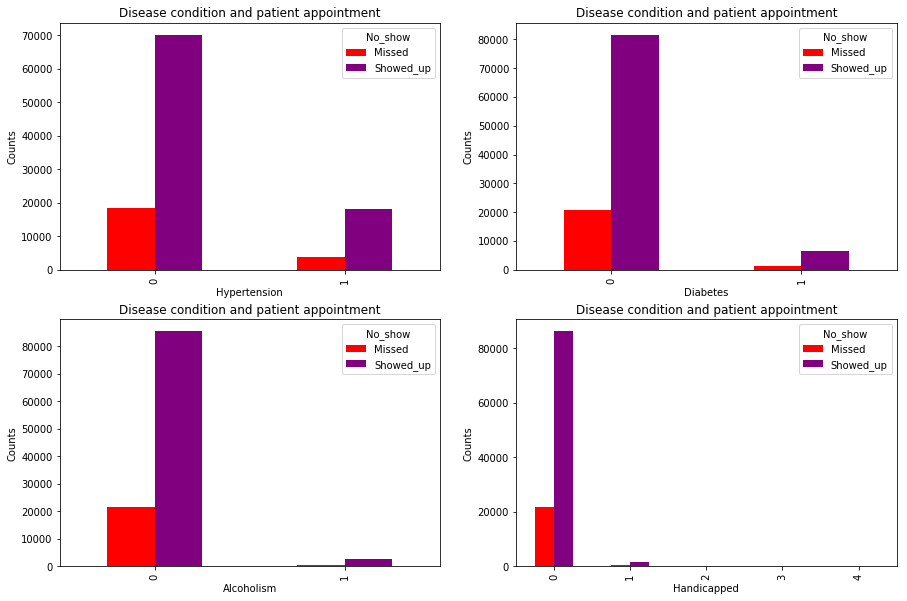

In [36]:
#to display multiple outputs in the cell
from IPython.display import display

#get the disease conditions
disease_conditions = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicapped']

#a for loop to plot disease conditions and patient appointment
fig = plt.figure(figsize=(15, 10))
for d,col in enumerate(disease_conditions):
    pl = fig.add_subplot(2,2, d+1)
    my_df.groupby([col, 'No_show'])[col].count().unstack('No_show').plot(ax=pl, kind = 'bar', stacked=False, 
                                                                        title = 'Disease condition and patient appointment', color = ['Red', 'Purple']).set_ylabel('Counts')
    #display the plot statistics
    display(pd.DataFrame(my_df.groupby([col, 'No_show'])['No_show'].count()))

From the plot above, looking at all four disease conditions, it was observed that those without any condition (0) tend to show up for appointments more than those with condition (1). The count of hypertensive patients that showed up for appointments is about 18,000. Only 6513 diabetic patients showed up for appointments, only 2683 alcoholic patients showed up for appointment. For handicapped patients, 1675 patients with one disability (1) showed up for appointments. 146 patients with two disabilities (2) showed for appointment, only 10 patients with three disabilities (3) showed up for appointment, and only 3 patients with four (4) disabilities showed up for appointment. This shows that the disease condition of the patient affects a patient showing up for appointments, especially for patients that are hypertensive.

<a id='conclusions'></a>
## Conclusions
I was able to investigate this medical dataset and discover some findings based on the questions infered from the dataset. The investigation of this dataset centered around patients showing up or not for appointments and different factors that may affect if they show up or not. I first of all checked the data for duplicates and null values, and I corrected typos and incorrect names in the columns and also added new column. I also made corrections in the datatypes of some variables like changing scheduled_day and appointment_day datatypes from string to datetime datatype. I used Age to predict the age groups that show up or miss appointments, I checked what gender of patients keep appointments, I also checked if patients that receive SMS reminders show up more than those that do not receive, I checked if the location of the hospital has a part to play in patients missing appointments, and I also checked if the disease condition of a patient affects if a patient shows up for appointments. I also realized a few things in this dataset;
<ul>
    <li>most patients are young people (especially infants)</li>
    <li>most patients do not suffer from conditions (diabetes, alcoholism, hypertension, handicap)</li>
    <li>only 20% of patients miss appointments</li>
    <li>65% of patients are females and 35% are males</li>
    <li>patients that receive SMS reminders are less than those that receive</li>
    <li>there were no duplicates or null values in the dataset</li>
</ul>
These are the summary of the findings  in relation to the questions asked;
<ol>
    <li>What is the percentage of patients that show up and do not show up for appointments?
    <p> I was able to check the overall percentage of patients that show up and do not show up for appointments and it was discovered that 79% of patients keep appointments</p></li>
    <li>What gender shows up more? <p> I was able to check the number of females and males that keep appointments and I observed that females keep appointments more than the males. This made me conclude that women are more concerned about health issues than the males</p></li>
    <li>Which neighbourhood has the highest number of patients that show up for appointments?<p> I was able to get the counts of patients that show up to appointments of different hospital locations using only the top 10 highest location counts. I found out that the neighborhood JARDIM CAMBURI has more patients that keep appointments</p></li>
    <li>What age group shows up or not for appointments?<p>I observed that patients 56 years and above show up more for appointments than other age groups.</p></li>
    <li>Does a patient show up or not for appointments based on SMS received?<p>I was able to realize that patients that do not receive SMS reminders tend to show up more than patients that receive SMS reminders. This is surprising as it was assumed that it would be the other way round</p></li>
    <li>Is disease condition a factor that predicts if patients show up for appointments or not? <p>I investigated if the disease condition affects if patients show up for appointments and was able to see that it does affect. Patients without any disease condition showed up more than patients with disease conditions. The highest number of patients with disease condition that did not show up were Hypertensive patients.</p> </li>
</ol>
<p>Appointment time should be added to the the dataset. Also the dataset needs to be updated. The address of the patients can be added to the dataset in other to compare the distance to the hospital from the patient's residence to provide a more clear reason that the hospital location is a factor that affects if a patient shows up for appointments or not. A patient might not really be able to keep up with appointments because the hospital may be quite far from his/her residence. Some columns in the dataset were not really clear, like the handicapped column that had 5 unique values unlike other conditions that had just 2 (yes and no). The discussions forum of the kaggle website where the dataset originates for had to be checked deeply for explanations regarding the handicapped column. For future purposes, the dataset should be more clear and concise.</p>



In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0